# Practical #3 - Random Forests and Support Vector Machines with Python

### Introduction

We will show some practical examples of how Python machine learning libraries can be used to implement analyses using Random Forests (RFs) and Support Vector Machines (SVMs).

*Caveat emptor: I have no background in applying these methods in an 'omics setting.*
 
Starting on familiar territory, we'll cover the approach to (multivariate) linear regression from the *scikit-learn* Python library. The plan is to then cover RFs, with some detail around how we can tune them; followed by a parallel treatment of SVMs.

There will be plenty of time at the end for questions, and to explore topics of interest in more detail.

## 0. Setup

You will need to install the [pandas](https://pandas.pydata.org/), [scikit-learn](https://scikit-learn.org/stable/), [matplotlib](https://matplotlib.org/), [plotnine](https://plotnine.readthedocs.io/en/stable/) and [xlrd](https://xlrd.readthedocs.io/en/latest/) packages to run this notebook, and you'll require Python >=3.6.

 To install these packages on Windows with Anaconda, launch the "Anaconda Prompt (Anaconda3)" program and run the following commands:

`conda install -c anaconda pandas scikit-learn matplotlib xlrd`

`conda install -c conda-forge plotnine`

<img src="../img/AZ_conda_prompt.png">

In [25]:
import pandas as pd
import plotnine as p9

### Load the MS/MS proteomics data from the Random Forest lecture

In [26]:
data = pd.read_csv("../data/Proteomics Normalized masked imputed data set.csv", index_col='SampleID')

In [3]:
data.loc[data.Group=='Treated', :]

,Group,Gender,Protein1,Protein2,Protein3,Protein4,Protein5,Protein7,Protein8,Protein9,...,Protein389,Protein390,Protein391,Protein393,Protein394,Protein395,Protein396,Protein398,Protein399,Protein400
SampleID,,,,,,,,,,,,,,,,,,,,,
1,Treated,Female,13.395059,13.983737,13.545473,18.070830,15.080636,16.927859,17.113667,16.284488,...,17.686488,18.304164,19.718565,15.492899,13.426433,14.496097,14.965646,14.132909,18.563253,15.694575
7,Treated,Female,12.822832,13.560786,14.816643,17.604433,14.688308,17.240859,15.923415,16.207913,...,16.804159,18.701603,19.128888,14.217616,13.824440,14.586767,13.075359,13.794316,18.449637,16.033618
9,Treated,Female,13.699296,13.832934,13.716009,17.979035,14.663934,17.703092,16.671470,16.370288,...,17.576112,18.378625,19.372813,15.331235,13.435619,14.193245,13.189482,13.734713,19.632406,15.773159
11,Treated,Female,13.631483,14.062301,13.596404,18.141549,14.697486,17.284693,16.628182,16.495602,...,17.730967,18.311278,19.705604,15.471692,14.188459,14.507591,16.731334,13.499540,18.977999,16.528497
12,Treated,Male,12.928066,13.640230,14.352655,17.586150,15.301073,17.144245,16.191082,15.892892,...,17.129022,18.168152,19.333841,13.463781,14.031804,14.269619,14.507767,13.938124,18.626870,16.668476
13,Treated,Male,13.834719,14.216487,13.268863,18.330153,14.641725,17.761328,17.402311,16.104008,...,17.345602,17.892115,19.280880,15.073827,15.010458,14.420080,13.123528,13.905441,18.438641,16.299480
14,Treated,Female,13.985409,13.731356,13.573741,17.907846,14.516796,16.721509,16.840481,16.646455,...,17.489972,18.317644,20.422450,14.714044,13.799560,14.367692,15.140944,13.520494,18.791642,17.027290
15,Treated,Male,13.242252,13.306215,13.284566,17.816539,14.663061,17.601551,16.188213,16.177094,...,17.495223,18.833345,19.116947,15.420816,14.886337,14.493726,14.968747,14.042084,19.106833,16.464650
16,Treated,Male,13.308470,13.941707,14.150895,17.560507,14.651357,17.704908,16.866150,16.177931,...,16.843071,18.389501,19.250743,15.226632,13.697908,14.598511,13.692664,13.554574,18.285242,16.782830


### Simple linear regression with sklearn

If we have a continuous variable, and we want to model its relationship with another variable, we can use simple linear regression. In linear regression we call the variable of interest the response, and the other variable the predictor.

In [4]:
y_vars = data.columns[2:]

Perform a three-dimensional Principal Components Analysis

In [5]:
from sklearn.decomposition import PCA
#X.loc[X.Group=='Treated', :]
pca = PCA(n_components=3)
data_r = pca.fit(data[y_vars]).transform(data[y_vars])

Explained variance per component: [0.21368479 0.16458218 0.09726457]. Total explained variance: 0.4755315359090516


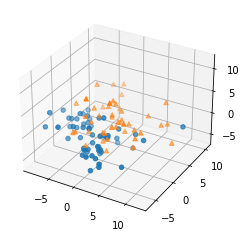

In [27]:
from matplotlib import pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for marker, group in (('o', 'Treated'), ('^', 'Control')):
    xs, ys, zs = data_r[data.Group == group].transpose()
    ax.scatter(xs, ys, zs, marker=marker)


print(f'Explained variance per component: {pca.explained_variance_ratio_}. Total explained variance: {sum(pca.explained_variance_ratio_)}')

Unfortunately, I'm not aware of a Python package the implements the eBayes functionality found in limma. Your best bet if you wish to remain in the Python interpreter is [r2py](https://rpy2.github.io/), but it's fairly clunky. For simple execution of R scripts, and collecting the results from stdout or local files, [subprocess](https://docs.python.org/3/library/subprocess.html) might suit better.

Let's take a look at the first two components using `plotnine` too.

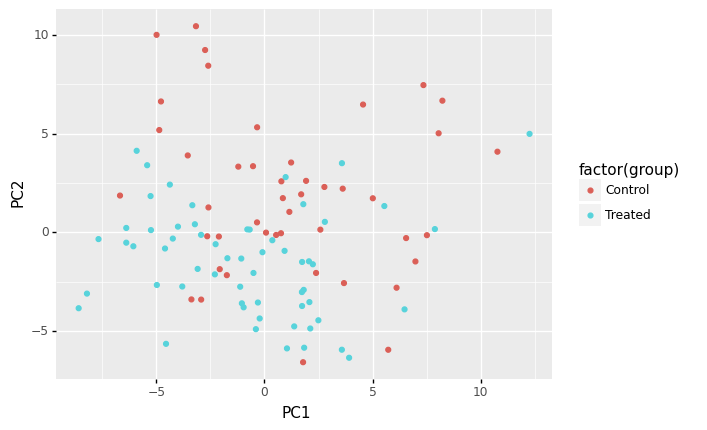

<ggplot: (318972712)>

In [7]:

components = pd.DataFrame({'PC1': data_r[:,0], 'PC2': data_r[:,1], 'group': data.Group}) # plotnine works with pd.DataFrame
(
p9.ggplot(components, p9.aes('PC1', 'PC2'))
    + p9.geom_point(p9.aes(color='factor(group)'))
)

Using `scikit-learn`, we can run simple linear regression using [sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). (One other option for working with linear models with Python is using `statsmodels` [statsmodels](https://www.statsmodels.org/stable/index.html).)

There are three steps to completing this analysis:
1. **Instantiate** the model: create an object that holds the model specification.
2. **Fit** the model: fit the specified model to the data using the `.fit` function.
3. **Display** the results: use the `X` method of the fitted model to return a detailed breakdown of the model characteristics.

In [28]:
import sklearn.linear_model as linear
import numpy as np

Let's do a simple, single variable regression on the first Protein.

Next, let's 'binarise' the `Group`. This is a transformation of a single column of binary categorical features into a column of `0.0`s and `1.0`s. It's what `factor` in R has a native understanding of.

In [30]:
y = (data.Group == 'Treated').astype(np.float)

In [31]:
# Instantiate the model
model = linear.LinearRegression()

# Define the predictor ('X') and the response ('y').
X = data.loc[:,["Protein1"]]

# Fit the model
model.fit(X, y)

LinearRegression()

In [32]:
X.shape, y.shape

((104, 1), (104,))

The intercept and slope are available as properties of the fitted `model` object.

In [33]:

model.coef_, model.intercept_

(array([0.13051296]), -1.1678578715900205)

For a linear model, `score` is just the R-squared, but you'll have to work out the sigmas and p-values yourself.

In [34]:
model.score(X, y)

0.016309362957675377

### Advantages of RFs over T-testing

As a reminder from the Lecture: 

- The usage of RFs vs. T-testing is completely different:
    - T test uses Control vs Treated to detect change in expression
    - RF uses expression to classify Control vs Treated

- RFs model all of the data to predict class (Control vs Trt)

- RFs can detect important proteins using complex nonlinear relationships.


In [35]:
# Define the predictors ('X') and the response ('y')
X = data.loc[:, y_vars]
X.head()

,Protein1,Protein2,Protein3,Protein4,Protein5,Protein7,Protein8,Protein9,Protein10,Protein11,...,Protein389,Protein390,Protein391,Protein393,Protein394,Protein395,Protein396,Protein398,Protein399,Protein400
SampleID,,,,,,,,,,,,,,,,,,,,,
1,13.395059,13.983737,13.545473,18.070830,15.080636,16.927859,17.113667,16.284488,19.002474,14.681880,...,17.686488,18.304164,19.718565,15.492899,13.426433,14.496097,14.965646,14.132909,18.563253,15.694575
2,13.597976,14.113782,13.203157,18.296307,14.394762,17.294919,16.789382,16.748987,16.208226,14.286381,...,17.645229,17.809404,20.071100,14.013504,13.515063,14.212375,13.060107,12.637402,18.428142,17.720108
3,13.394852,13.783609,13.329257,18.184578,14.835444,17.838919,16.818852,16.527966,17.181024,13.978372,...,17.435788,18.005453,19.972558,15.155675,12.984630,14.761344,14.298746,13.460417,18.680861,16.563497
4,14.053963,14.807434,13.847393,18.305409,14.172017,17.519032,16.596987,17.800738,17.076839,14.471338,...,18.064383,18.160604,21.259981,14.153829,13.491864,14.409319,15.334132,13.195970,18.772351,18.201775
5,13.493014,14.033405,13.730564,17.978242,14.116933,17.234302,16.939951,17.132565,16.605225,14.046166,...,17.676840,18.632813,20.766384,14.272394,12.625947,14.225775,13.706230,13.034337,18.400382,17.585588


Now we have a `pandas.DataFrame` that is an array of `float`s, we can use `tree.DecisionTreeClassifier()`.

In [36]:
from sklearn import tree
# Instantiate the model
model = tree.DecisionTreeClassifier(max_depth=1)
# Fit the pipeline
model.fit(X, y)

DecisionTreeClassifier(max_depth=1)

Visualise the model using `sklearn.tree`. To get a feel of the Gini index, it's a weighted sum of how close the proportions are in each class from being equal (geometrically, how close is rectangle with sides `(P(Group="Contol")`, `P(Group="Treated"))` to being square).

[Text(167.4, 163.07999999999998, 'X[315] <= 18.667\ngini = 0.491\nsamples = 104\nvalue = [45, 59]'),
 Text(83.7, 54.360000000000014, 'gini = 0.108\nsamples = 35\nvalue = [33, 2]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.287\nsamples = 69\nvalue = [12, 57]')]

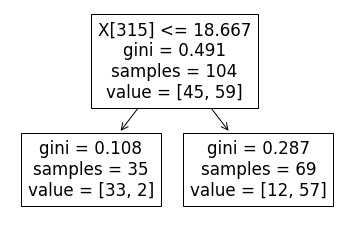

In [37]:
tree.plot_tree(model) 


Now work out the confusion matrix. We see exactly the same performance as with the R code, even though we split on a different protein in the first instance. Why might this be?

In [38]:
from sklearn.metrics import confusion_matrix
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
y_hat = model.predict(X)
confusion_matrix(y, y_hat, labels=[0,1])

array([[33, 12],
       [ 2, 57]])

In [39]:
from sklearn.ensemble import RandomForestClassifier

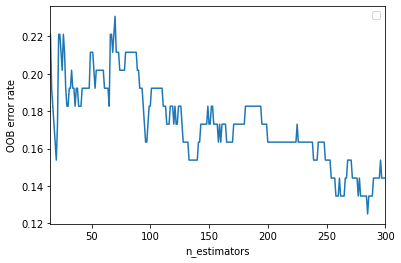

In [41]:
rf = RandomForestClassifier(max_features='sqrt', warm_start=True, oob_score=True)

error_rate = []
min_estimators = 15
max_estimators = 300

for i in range(min_estimators, max_estimators + 1):
        rf.set_params(n_estimators=i)
        rf.fit(X, y)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - rf.oob_score_
        error_rate.append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.

xs, ys = zip(*error_rate)
plt.plot(xs, ys)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend('')
plt.show()

In [42]:
def plot_importances(columns, importances, yerr=None, max_features=20):
    feature_importances = pd.DataFrame()
    feature_importances['feature'] = columns
    feature_importances['importance'] = importances
    feature_importances.sort_values(by=['importance'], ascending=True, inplace=True)
    feature_importances.set_index('feature', inplace=True)
    feature_importances.iloc[-max_features:,:].plot(kind='barh', yerr=None, figsize=(25, 25))

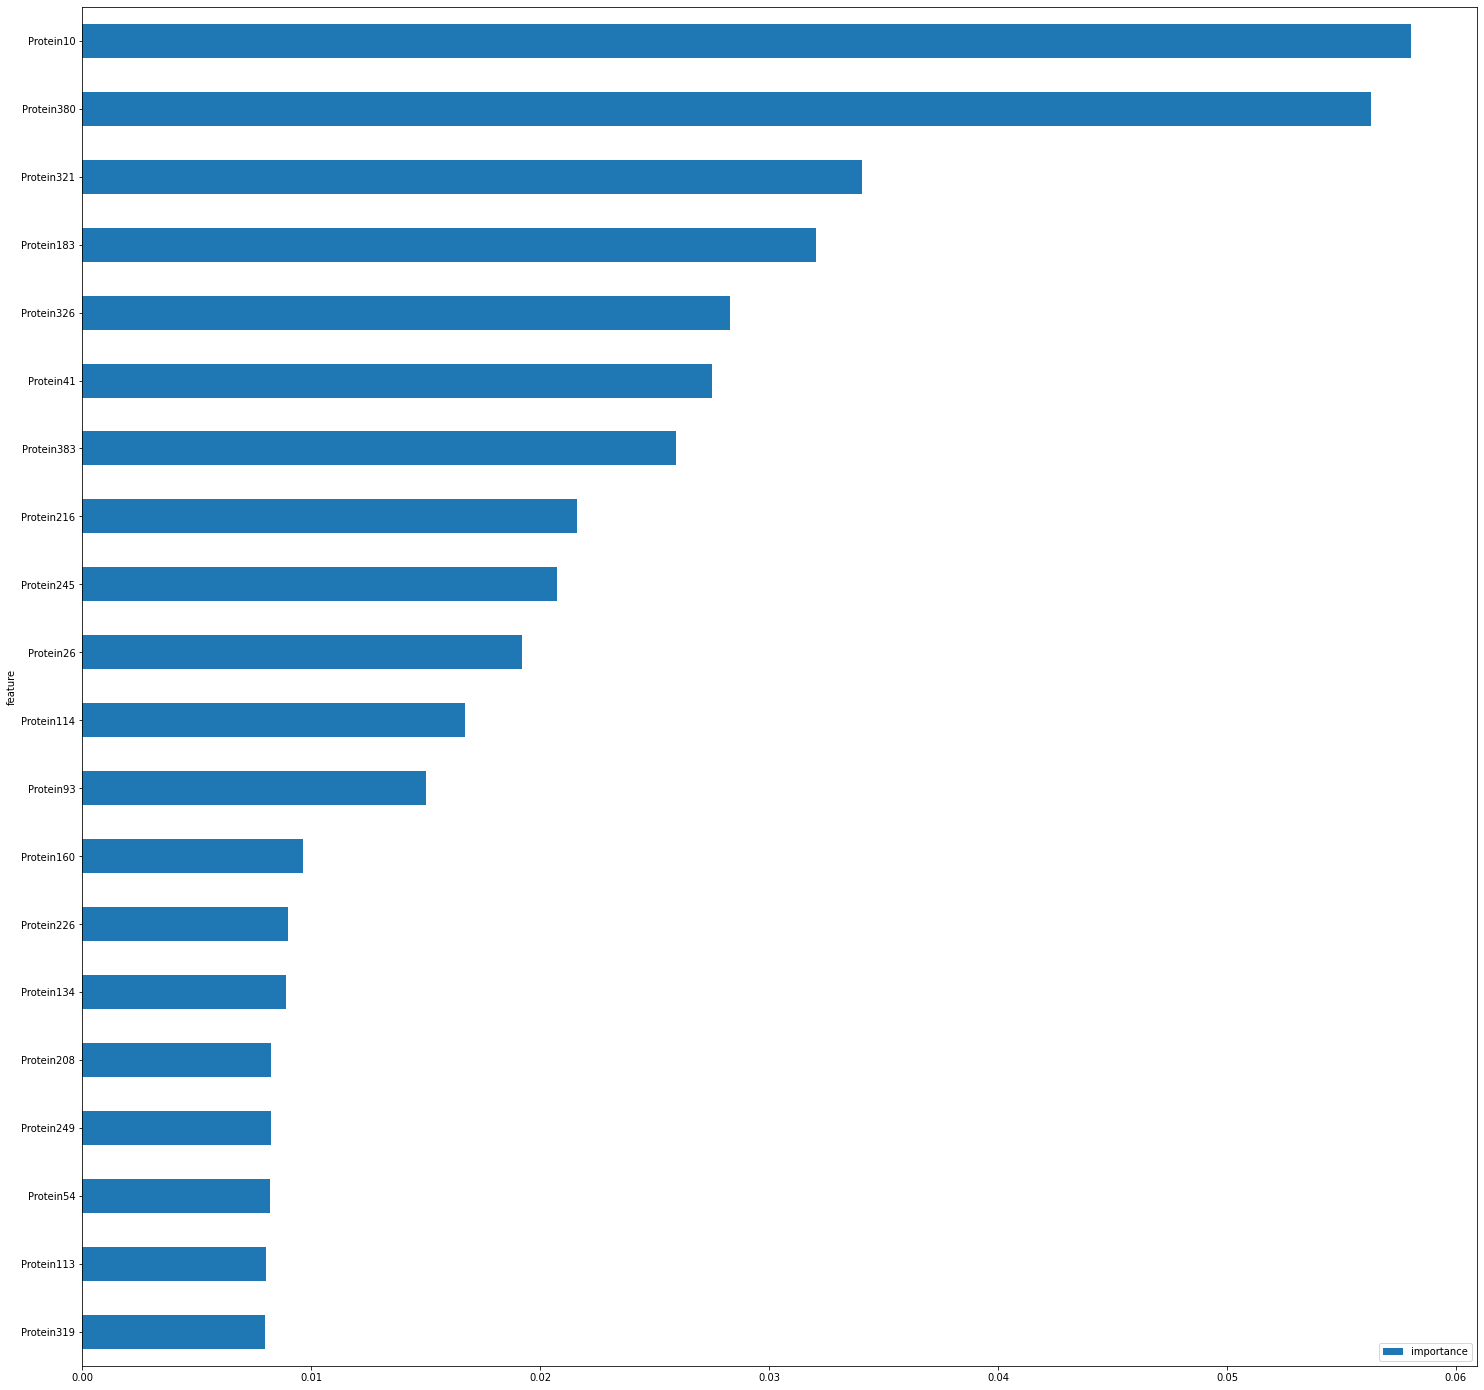

In [43]:
plot_importances(columns=X.columns, importances=rf.feature_importances_)

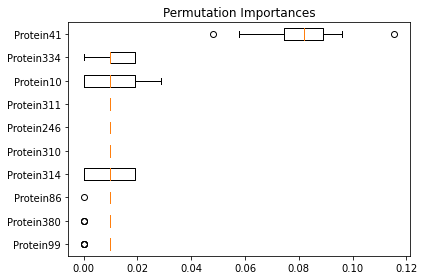

In [44]:
from sklearn.inspection import permutation_importance
rf = RandomForestClassifier(n_estimators=10, max_features=36).fit(X, y)
result = permutation_importance(rf, X, y, n_repeats=20)

fig, ax = plt.subplots()
sorted_idx = result.importances_mean.argsort()[-10:]
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X.columns[sorted_idx])
ax.set_title("Permutation Importances")
fig.tight_layout()
plt.show()